In [1]:
#Uses artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price using past 60 day price
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('HistoricRates_BTC(test)')

In [3]:
#df = df.set_index(pd.DatetimeIndex(df['date'].values))
#df = df.sort_index()

In [4]:
df

,low,high,open,close,volume,date
0,7630.00,8187.03,8037.73,7934.52,25563.614175,2020-08-03
1,7733.56,8158.25,7934.56,7894.68,17172.471301,2020-09-03
2,7583.27,7987.97,7894.68,7938.05,13647.865139,2020-10-03
3,4644.00,7969.45,7938.05,4857.10,113902.203329,2020-11-03
4,3858.00,5995.00,4857.10,5637.60,130316.646844,2020-12-03
...,...,...,...,...,...,...
295,25833.73,27396.77,27039.39,27366.35,20668.104338,2020-12-28
296,27311.73,29018.26,27366.35,28897.42,28181.496815,2020-12-29
297,28000.00,29321.90,28897.42,28990.08,28813.886911,2020-12-30
298,28700.00,29688.88,28990.08,29412.84,22211.252518,2020-12-31


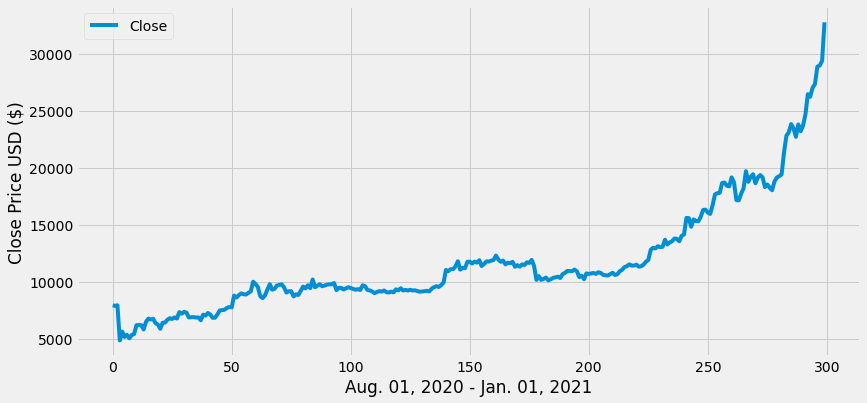

In [5]:
plt.figure(figsize=(12.5, 6))

plt.plot(df['close'], label='Close')
plt.xlabel('Aug. 01, 2020 - Jan. 01, 2021')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Create DF with only "close"
data = df.filter(['close'])
#Convert to array
dataset = data.values
#Get number of rows to train model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

240

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
#Create the training data set
#Create the sacled training data set

train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.11016608, 0.10873988, 0.11029245, 0.        , 0.02794049,
       0.01103121, 0.01747847, 0.00646193, 0.01699018, 0.01992313,
       0.04758153, 0.04829176, 0.04802972, 0.03440743, 0.05847742,
       0.06835808, 0.06564888, 0.06805523, 0.05424357, 0.04992846,
       0.0365181 , 0.05546214, 0.05610472, 0.06475929, 0.06971412,
       0.06747566, 0.07222894, 0.0687737 , 0.08893918, 0.08387195,
       0.08996122, 0.08720941, 0.07212656, 0.07276162, 0.07342317,
       0.07174352, 0.07232202, 0.06325612, 0.08074426, 0.07805295,
       0.08608249, 0.08139113, 0.07091944, 0.07147396, 0.08161058,
       0.09421118, 0.09513513, 0.0963154 , 0.10199979, 0.10498429,
       0.10373994, 0.14092496, 0.13485824, 0.14220188, 0.14779213,
       0.14508471, 0.14413892, 0.14933897, 0.15388534, 0.18427729])]
[0.1773048756782415]

[array([0.11016608, 0.10873988, 0.11029245, 0.        , 0.02794049,
       0.01103121, 0.01747847, 0.00646193, 0.01699018, 0.01992313,
       0.04758153, 0.04829176, 0.048

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(180, 60, 1)

In [11]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

180/180 [==============================] - 5s 16ms/step - loss: 0.0035


In [14]:
#Create the testing data set
#Create the new array containing scaled values from rest of data
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [15]:
#Convert the data to array
x_test = np.array(x_test)
x_test.shape

(60, 60)

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

907.784490234375

C:\Users\jwkon\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


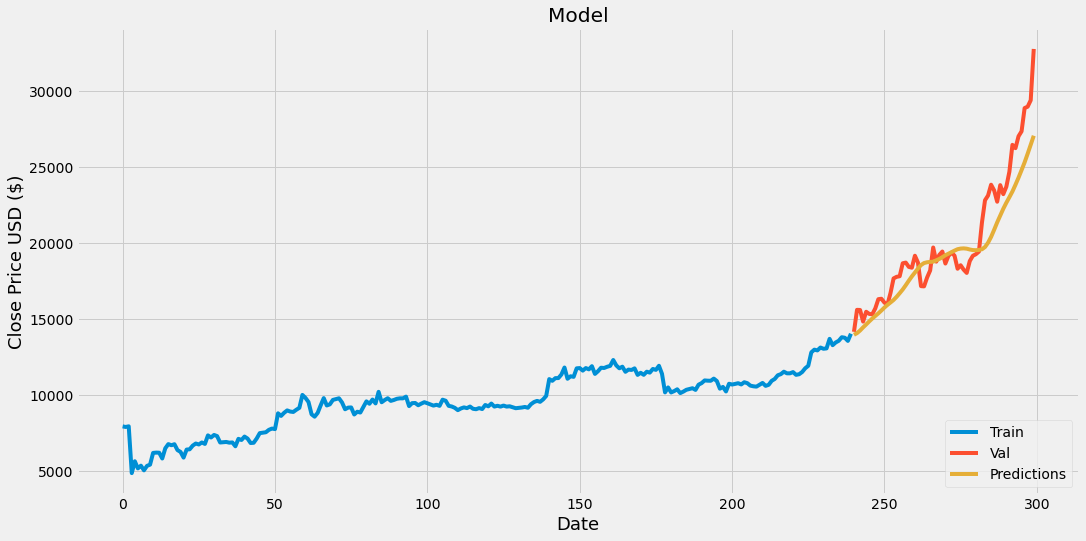

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
#Show valid and predicted prices
valid.head()

,close,Predictions
240,14161.48,13965.841797
241,15608.21,14075.431641
242,15599.95,14246.452148
243,14834.09,14454.727539
244,15482.90,14646.465820


In [ ]:
#Get the quote
